## Purpose

This notebook will use simulation to answer the question "How does slope affect ratio measures?"

In [1]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from fooof import FOOOF, FOOOFGroup
from fooof.analysis import *
from fooof.utils import trim_spectrum
from fooof.synth import gen_group_power_spectra, param_sampler, gen_power_spectrum

from utils.ratios import *

In [2]:
slopes = np.arange(.25,3,.25) # global scope - will be reset during each function call to not make things messy
theta_band = [4,8]
beta_band = [15,30]
alpha_band = [8,12]

The procedure is to make simulated data with and without oscillations, save that data, and analyze it.

The following cells generate group power spectra for cases with and without oscillations. 100 simulations are created for each slope value from .25 to 5. The data is then saved to the /dat directory

In [ ]:
theta_beta_data = []
i = 1

while(i*.25 < 5):
    bg = [0,i*.25]
        
    #100 trails for each treatment and control sim
    freq, power, _ = gen_group_power_spectra(100, [1,50], bg, func(), nlvs=np.random.uniform(.005,.02))
    fg = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)
    fg.fit(freq, power)
    res.append(get_group_ratios(fg,low_band_range,high_band_range))
    i+=1

#### Theta/Beta

In [3]:
theta_beta_data = sim_slope_data(5,theta_band, beta_band, osc=True)
theta_beta_null = sim_null_data(5,theta_band, beta_band, osc=False)

np.save('./dat/Theta_Beta_Slope',theta_beta_data)
np.save('./dat/Theta_Beta_Null',theta_beta_null)

NameError: name 'gen_group_power_spectra' is not defined

The same thing is done as above except instead of the calculated ratios being Theta/Beta, Alpha/Beta is calculated.

#### Alpha/Beta

In [19]:
alpha_beta_data = sim_slope_data(3,alpha_band, beta_band, osc=True)
alpha_beta_null = sim_null_data(3,alpha_band, beta_band, osc=False)

np.save('./dat/Alpha_Beta_Slope',alpha_beta_data)
np.save('./dat/Alpha_Beta_Null',alpha_beta_null)

theta_beta_data, theta_beta_null, alpha_beta_data, alpha_beta_null are all 3-D arrays in the form of [slope][ratio method][trial], the following cell averages all the trials.

In [20]:
tb_sim = average_of_sims(theta_beta_data)
tb_null = average_of_sims(theta_beta_null)

ab_sim = average_of_sims(alpha_beta_data)
ab_null = average_of_sims(alpha_beta_null)

## Using Pandas

We will now create Pandas dataframes to easily extract specific columns to compute statisitics and for visualizations.

In [10]:
# Theta/ Beta ratios
df_tb_sim = pd.DataFrame(tb_sim,columns = ["average_power","central_frequency", "power_density" ])
df_tb_null = pd.DataFrame(tb_null,columns = ["average_power","central_frequency", "power_density" ])

In [ ]:
# Alpha/ Beta ratios
df_ab_sim = pd.DataFrame(ab_sim,columns = ["average_power","central_frequency", "power_density" ])
df_ab_null = pd.DataFrame(ab_null,columns = ["average_power","central_frequency", "power_density" ])

The next cells isolate each column from all the tables

#### Theta Beta ratio columns

In [11]:
# Acquires the values for each column in Theta/Beta DataFrames
average_power_tb_sim = df_tb_sim.average_power.values
central_frequency_tb_sim = df_tb_sim.central_frequency.values
power_density_tb_sim = df_tb_sim.power_density.values

# Theta/Beta null ratios
average_power_tb_null = df_tb_null.average_power.values
central_frequency_tb_null = df_tb_null.central_frequency.values
power_density_tb_null = df_tb_null.power_density.values

In [7]:
# Acquires the values for each column in Alpha/Beta DataFrames
average_power_ab_sim = df_ab_sim.average_power.values
central_frequency_ab_sim = df_ab_sim.central_frequency.values
power_density_ab_sim = df_ab_sim.power_density.values

# Alpha/Beta null ratios
average_power_ab_null = df_ab_null.average_power.values
central_frequency_ab_null = df_ab_null.central_frequency.values
power_density_ab_null = df_ab_null.power_density.values

NameError: name 'df_ab_sim' is not defined

We cannot use the central frequency method because it uses peak information to find central frequency but we dont have peaks because we do not induce "oscillations" in null sythetic data

### Theta/Beta Cannonical method

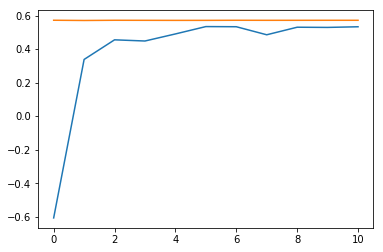

In [13]:
# Theta/Beta cannoical calculation plot
plt.plot(average_power_tb_sim)
plt.plot(average_power_tb_null) 

### Theta/Beta Density method

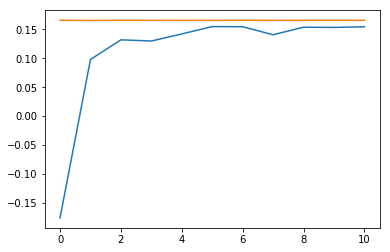

In [14]:
# Theta/Beta density plot
plt.plot(power_density_tb_sim) 
plt.plot(power_density_tb_null)

### Alpha/Beta Cannonical method

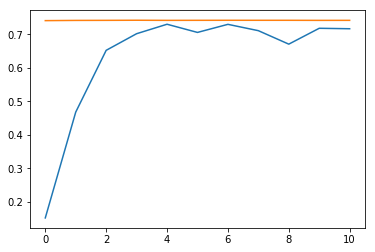

In [15]:
plt.plot(average_power_ab_sim)
plt.plot(average_power_ab_null) 

### Alpha/Beta Density method

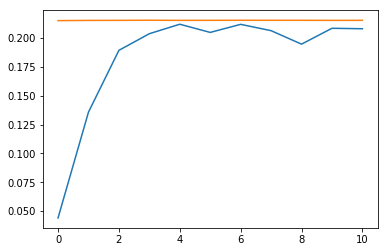

In [16]:
plt.plot(power_density_ab_sim)
plt.plot(power_density_ab_null) 

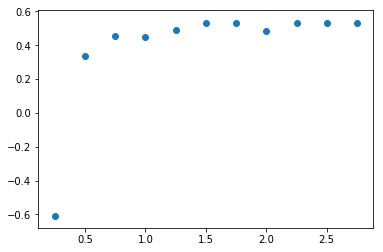

In [22]:
plt.scatter(slopes,average_power_tb_sim)

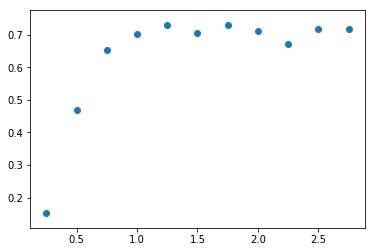

In [24]:
plt.scatter(slopes,average_power_ab_sim)